### Example of Seismic Facies Benchmark using Dasf Pipeline

All the code was taken from the original project and modeled using DASF framework.

For further details, see the original project [here](https://github.com/yalaudah/facies_classification_benchmark).

In [ ]:
from dasf.datasets import F3Train
from dasf.datasets import F3Labels
from dasf.datasets import F3TrainLoader
from dasf.datasets import F3ValLoader
from dasf.datasets import F3TrainDataset
from dasf.ml.dl import PLPipeline
from dasf.ml.dl.models import TorchSectionDeConvNetSkip

In [ ]:
from dasf.pipeline import ComputePipeline
from dasf.pipeline.executors import DaskPipelineExecutor

In [ ]:
dask = DaskPipelineExecutor(local=True)

In [4]:
f3t = F3Train(replicate=True)
f3l = F3Labels(replicate=True)

f3td = F3TrainDataset()

f3train = F3TrainLoader()
f3val = F3ValLoader()

model = TorchSectionDeConvNetSkip(n_classes=6)

dl = PLPipeline(batch_size=32, num_epochs=1)

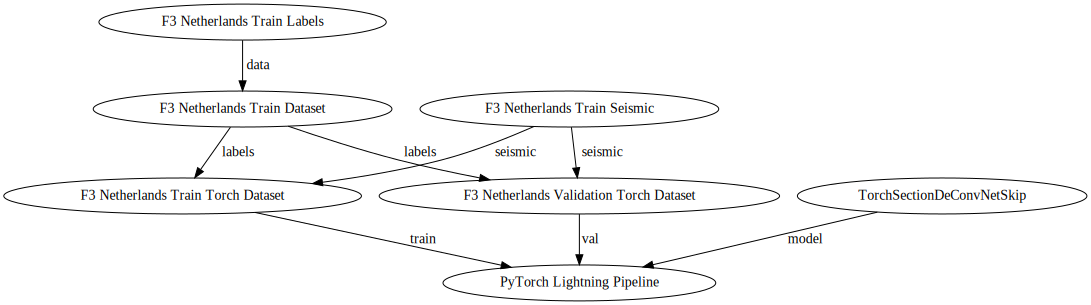

In [5]:
pipeline = ComputePipeline("Deconvnet pipeline", executor=dask)

pipeline.add_parameters([f3t, f3l, model])

pipeline.add(f3td, data=f3l) \
        .add(f3train, seismic=f3t, labels=f3td) \
        .add(f3val, seismic=f3t, labels=f3td) \
        .add(dl, model=model, train=f3train, val=f3val) \
        .visualize()